# Qiskit v2.0 — Ep. 5: Preparing Multi‑Qubit States — Bell States and Ordering

From single‑qubit superposition to two‑qubit **entanglement**. We'll build a Bell state and review Qiskit's bit ordering.

## 1) Start from $|00\rangle$
In Qiskit, two qubits initialize in $|00\rangle$. We'll first create a superposition on qubit **0**, then entangle with **CNOT**.

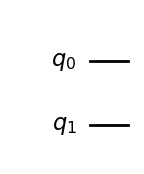

In [1]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.draw('mpl')

## 2) Create the superposition on qubit 0

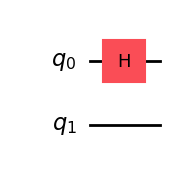

In [2]:
qc = QuantumCircuit(2)
qc.h(0)               # Put qubit 0 in (|0>+|1>)/sqrt(2)
qc.draw('mpl')

## 3) Entangle with CNOT (CX)
Control = qubit 0, Target = qubit 1. Result should be the Bell state $|\Phi^+\rangle = (|00\rangle + |11\rangle)/\sqrt{2}$.

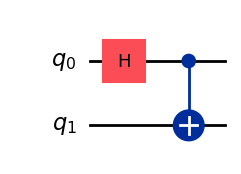

In [3]:
qc.cx(0, 1)
qc.draw('mpl')

## 4) Bit ordering in Qiskit (little‑endian)
- In statevectors/bitstrings, the **rightmost** bit corresponds to **qubit 0**.
- Example: `10` means qubit 1 = 1, qubit 0 = 0.

## 5) Visualize the Bell state

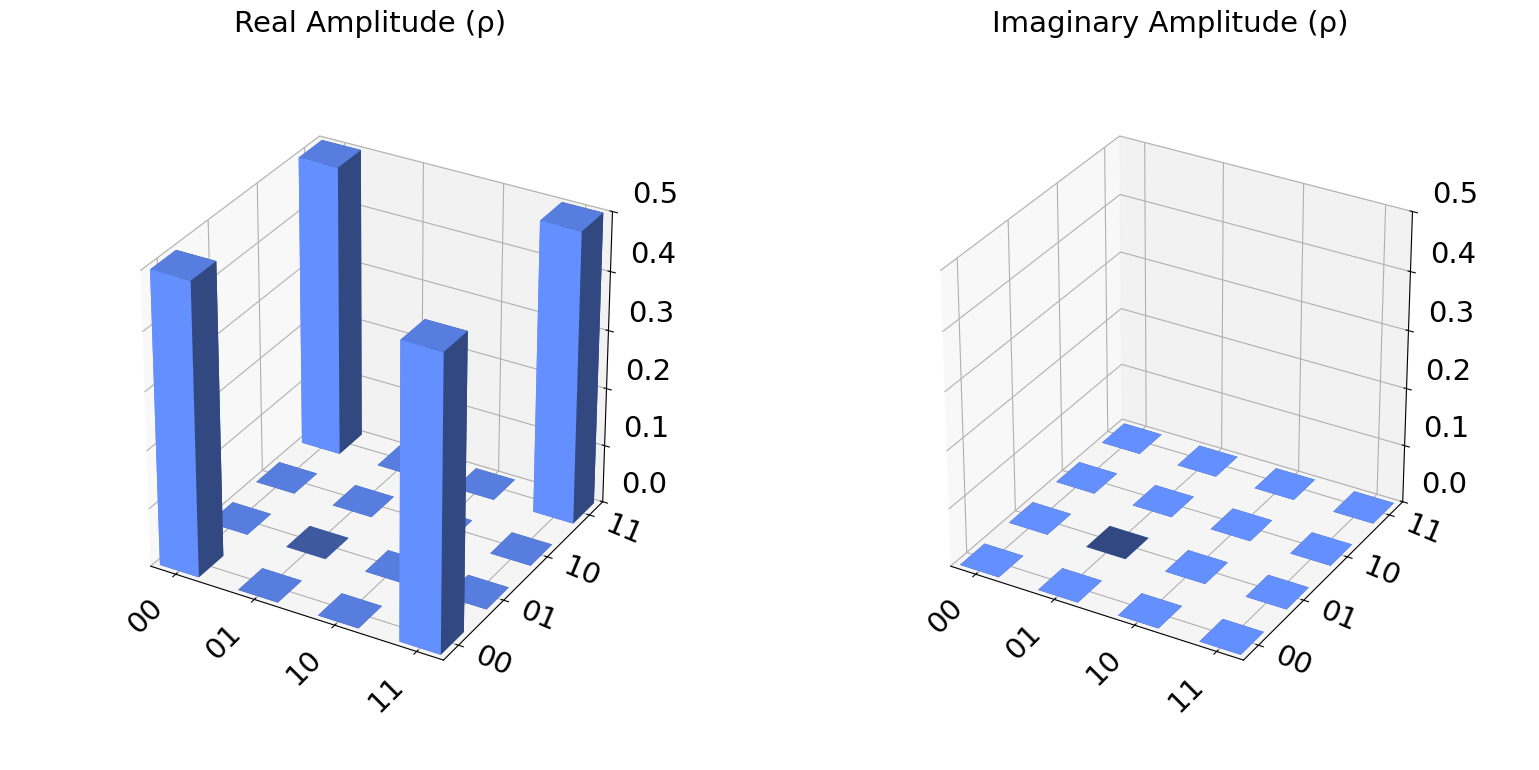

Statevector:
Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


In [4]:
from qiskit.quantum_info import Statevector, partial_trace
from qiskit.visualization import plot_state_city

state = Statevector.from_instruction(qc)
display(plot_state_city(state))
print("Statevector:")
print(state)

## 6) Quick checks of entanglement
The reduced state of either qubit should be maximally mixed (not pure) for a Bell state.

In [6]:
rho = state.to_operator().data  # full density matrix 4x4
rho0 = partial_trace(state, [1]).data  # trace out qubit 1 -> state of qubit 0
rho1 = partial_trace(state, [0]).data  # trace out qubit 0 -> state of qubit 1

import numpy as np
def purity(r: np.ndarray) -> float:
    """
    Calculate the purity of a quantum state represented by a density matrix.
    Purity is defined as Tr(rho^2), where rho is the density matrix.
    For a pure state, purity = 1; for a mixed state, purity < 1.
    
    Parameters:
        r (numpy.ndarray): Density matrix of the quantum state.
    Returns:
        float: Purity of the quantum state.
    """
    return float(np.real(np.trace(r @ r)))

print("Purity qubit 0:", purity(rho0))  # ~0.5 for maximally mixed 2x2
print("Purity qubit 1:", purity(rho1))

Purity qubit 0: 0.4999999999999998
Purity qubit 1: 0.4999999999999998


## 7) Optional: sample on simulator
Measuring $|\Phi^+\rangle$ gives only `00` or `11` (perfect correlations) in the Z basis.

Counts: {'00': 2005, '11': 1995}


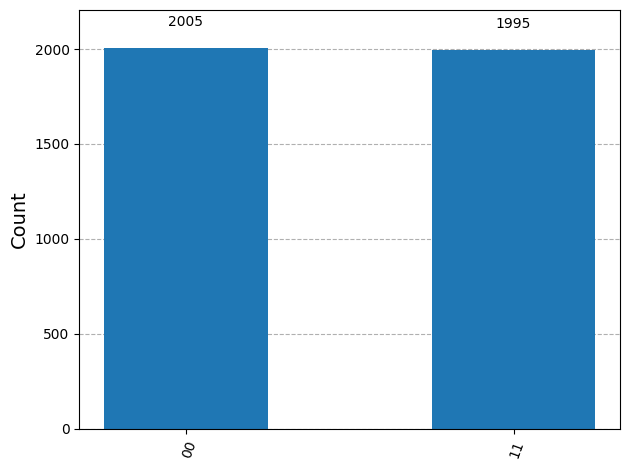

In [8]:
from qiskit_aer import Aer
from qiskit import transpile
from qiskit.visualization import plot_histogram

sim = Aer.get_backend('aer_simulator')
meas = qc.copy()
meas.measure_all()
t = transpile(meas, sim)
res = sim.run(t, shots=4000).result()
print("Counts:", res.get_counts())
plot_histogram(res.get_counts())

## 8) Variants
Swap H/CX placement to generate other Bell states, e.g. add `X(1)` or `Z(0)` to reach $|\Psi^+\rangle$, $|\Phi^-\rangle$, etc.

## 9) Mini-challenge: 

### 9.1 Challenge — Create a different Bell state

**Goal:** Starting from $|00\rangle$, build the Bell state  
$$
|\Psi^+\rangle = \frac{|01\rangle + |10\rangle}{\sqrt{2}}
$$ 
and verify its entanglement.

**Hints:**
- Recall: $|\Psi^+\rangle$ can be obtained by creating $|\Phi^+\rangle$ and flipping **one** qubit with an $X$ gate.
- Use purity checks and measurement histograms to verify.

**Your solution:**

<details><summary><b>Show solution</b></summary>

```python
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, partial_trace
from qiskit.visualization import plot_state_city, plot_histogram
from qiskit_aer import Aer
from qiskit import transpile
import numpy as np

# Step 1: Create |00>
qc_challenge = QuantumCircuit(2)

# Step 2: H on qubit 0
qc_challenge.h(0)

# Step 3: CNOT(0 -> 1) to make |Φ+>
qc_challenge.cx(0, 1)

# Step 4: Flip qubit 1 to turn |Φ+> into |Ψ+>
qc_challenge.x(1)

qc_challenge.draw("mpl")
```
</details>


### Verify entanglement and state form

We expect:
- Statevector close to $|\Psi^+\rangle = (|01\rangle + |10\rangle)/\sqrt{2}$
- Purity of reduced states ≈ 0.5
- Measurement in Z basis yields only `01` and `10` outcomes with ~50% probability each.


In [ ]:
qc_challenge = "Name as your challenge circuit"

# Statevector
state_challenge = Statevector.from_instruction(qc_challenge)
display(plot_state_city(state_challenge))
print("Statevector:")
print(state_challenge)

# Purity check function
def purity(r: np.ndarray) -> float:
    return float(np.real(np.trace(r @ r)))

rho0 = partial_trace(state_challenge, [1]).data
rho1 = partial_trace(state_challenge, [0]).data

print("Purity qubit 0:", purity(rho0))
print("Purity qubit 1:", purity(rho1))

# Sampling
sim = Aer.get_backend("aer_simulator")
meas_challenge = qc_challenge.copy()
meas_challenge.measure_all()
t_challenge = transpile(meas_challenge, sim)
res_challenge = sim.run(t_challenge, shots=4000).result()

print("Counts:", res_challenge.get_counts())
plot_histogram(res_challenge.get_counts())


### 9.2 Challenge — Build all four Bell states
**Task.** Starting from `|00⟩`, build the four Bell states using single‑qubit Paulis around the `H(0); CX(0,1)` pattern:

- Bell-Φ+:  `(I ⊗ I)  · CX · (H ⊗ I) |00⟩`
- Bell-Φ−:  `(Z ⊗ I)  · CX · (H ⊗ I) |00⟩`
- Bell-Ψ+:  `(X ⊗ I)  · CX · (H ⊗ I) |00⟩`
- Bell-Ψ−:  `(XZ ⊗ I) · CX · (H ⊗ I) |00⟩`

Verify each by computing the statevector and checking that only the two expected basis states have amplitude 1/√2 (up to global phase).

**Starter Code:**

In [7]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import numpy as np

def bell_base() -> QuantumCircuit:
    """
    Create the base quantum circuit for Bell state preparation.

    This function builds the common two-qubit circuit structure used to 
    generate all Bell states:
    
        1. Apply a Hadamard gate to qubit 0, creating a superposition.
        2. Apply a CNOT (CX) with qubit 0 as control and qubit 1 as target,
           entangling the qubits into the |Φ+⟩ state.

    Returns:
        QuantumCircuit: The 2-qubit circuit in the |Φ+⟩ configuration before 
        any additional single-qubit operations.
    """
    qc = QuantumCircuit(2)
    qc.h(0)
    qc.cx(0, 1)
    return qc

def bell_state(which: str) -> Statevector:
    """
    Construct a specific Bell state as a Statevector.

    Uses the base Bell state circuit (|Φ+⟩) and applies the appropriate 
    single-qubit Pauli gates on qubit 0 to obtain one of the four Bell states:

        - 'phi_plus'  : |Φ+⟩ = (|00⟩ + |11⟩) / √2
        - 'phi_minus' : |Φ−⟩ = (|00⟩ − |11⟩) / √2   → Apply Z on qubit 0
        - 'psi_plus'  : |Ψ+⟩ = (|01⟩ + |10⟩) / √2   → Apply X on qubit 0
        - 'psi_minus' : |Ψ−⟩ = (|01⟩ − |10⟩) / √2   → Apply X then Z on qubit 0

    Args:
        which (str): Label of the desired Bell state 
                     ('phi_plus', 'phi_minus', 'psi_plus', 'psi_minus').

    Returns:
        Statevector: The statevector representation of the chosen Bell state.

    Raises:
        ValueError: If `which` is not one of the supported Bell state labels.
    """
    qc = bell_base()
    if which == 'phi_plus':
        pass
    elif which == 'phi_minus':
        qc.z(0)
    elif which == 'psi_plus':
        qc.x(0)
    elif which == 'psi_minus':
        qc.z(0); qc.x(0)  # XZ on qubit 0
    else:
        raise ValueError('Unknown bell label')
    return Statevector.from_instruction(qc)

labels = {
    'phi_plus': (['00','11'], "|Φ+⟩=(|00⟩+|11⟩)/√2"),
    'phi_minus':(['00','11'], "|Φ−⟩=(|00⟩−|11⟩)/√2"),
    'psi_plus': (['01','10'], "|Ψ+⟩=(|01⟩+|10⟩)/√2"),
    'psi_minus':(['01','10'], "|Ψ−⟩=(|01⟩−|10⟩)/√2"),
}

for k,(expected, title) in labels.items():
    sv = bell_state(k)
    amps = {b: sv.data[int(b,2)] for b in ['00','01','10','11']}
    nonzero = [b for b,a in amps.items() if not np.isclose(abs(a),0.0)]
    print(f"{title}: support = {nonzero}")
    assert set(nonzero) == set(expected), f"Support mismatch for {k}"
print("All Bell states constructed with expected support.")


|Φ+⟩=(|00⟩+|11⟩)/√2: support = ['00', '11']
|Φ−⟩=(|00⟩−|11⟩)/√2: support = ['00', '11']
|Ψ+⟩=(|01⟩+|10⟩)/√2: support = ['01', '10']
|Ψ−⟩=(|01⟩−|10⟩)/√2: support = ['01', '10']
All Bell states constructed with expected support.


The starter code is your starting point: you already have the basic recipe `H(0); CX(0,1)` to generate |Φ+⟩, and your challenge is to modify it with X and Z gates to obtain the other three Bell states.

**Your solution:**

<details><summary><b>Show solution</b></summary>

```python
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import numpy as np

def bell_base():
    qc = QuantumCircuit(2)
    qc.h(0)
    qc.cx(0, 1)
    return qc

def bell_state(which: str) -> Statevector:
    qc = bell_base()
    # Paulis on qubit 0 to navigate the Bell basis
    if which == 'phi_plus':
        # (I ⊗ I) · CX · (H ⊗ I)
        pass
    elif which == 'phi_minus':
        # (Z ⊗ I) · CX · (H ⊗ I)
        qc.z(0)
    elif which == 'psi_plus':
        # (X ⊗ I) · CX · (H ⊗ I)
        qc.x(0)
    elif which == 'psi_minus':
        # (XZ ⊗ I) · CX · (H ⊗ I)
        qc.z(0); qc.x(0)
    else:
        raise ValueError('Unknown bell label')
    return Statevector.from_instruction(qc)

labels = {
    'phi_plus': (['00','11'], "|Φ+⟩=(|00⟩+|11⟩)/√2"),
    'phi_minus':(['00','11'], "|Φ−⟩=(|00⟩−|11⟩)/√2"),
    'psi_plus': (['01','10'], "|Ψ+⟩=(|01⟩+|10⟩)/√2"),
    'psi_minus':(['01','10'], "|Ψ−⟩=(|01⟩−|10⟩)/√2"),
}

def pretty_amp(a):
    # helper for readable output
    mag, phase = np.abs(a), np.angle(a)
    return f"{mag:.3f}·e^{phase:+.2f}i"

for key,(expected, title) in labels.items():
    sv = bell_state(key)
    # Map amplitudes by computational basis bitstrings (left bit = qubit 1, right = qubit 0)
    amps = {b: sv.data[int(b,2)] for b in ['00','01','10','11']}
    support = [b for b,a in amps.items() if not np.isclose(np.abs(a),0.0)]
    print(f"\n{title}")
    for b in ['00','01','10','11']:
        print(f"  |{b}⟩: {pretty_amp(amps[b])}")
    assert set(support) == set(expected), f"Support mismatch for {key}"
    mags = [np.abs(amps[b]) for b in expected]
    assert all(np.isclose(m, 1/np.sqrt(2), atol=1e-8) for m in mags), "Magnitudes not 1/√2"
print("\nAll Bell states verified: support and magnitudes match the expected patterns.")
```
</details>

### 9.3 Challenge — Entanglement entropy (optional)
**Task.** Compute the von Neumann entropy $S(\rho_0) = -\operatorname{Tr}(\rho_0 \log_2 \rho_0)$ of the reduced state of qubit 0 for `|Φ+⟩`.

**Expected.** `S(ρ₀) = 1` for a maximally entangled two‑qubit pure state.

> 💡 *Hint:* First obtain the reduced density matrix ρ₀ by tracing out qubit 1, then use its eigenvalues to compute the entropy.

**Your solution:**

<details>
<summary><b>Show solution</b></summary>

```python
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, partial_trace
import numpy as np

# Build |Φ+⟩
qc = QuantumCircuit(2)
qc.h(0); qc.cx(0,1)
sv = Statevector.from_instruction(qc)

# Reduced state of qubit 0
rho0 = partial_trace(sv, [1]).data

# Von Neumann entropy in bits
evals = np.clip(np.linalg.eigvalsh(rho0), 0.0, 1.0)  # numerical safety
eps = 1e-15
entropy = -float(np.sum([e*np.log2(e) for e in evals if e > eps]))

print("Eigenvalues(ρ0):", np.round(evals, 6))
print("Von Neumann entropy S(ρ0) [bits]:", round(entropy, 6))
```
</details>

## Additional information

**Created by:** Ricard Santiago Raigada García

**Version:** 1.0.0